### Imports

In [1]:
import Functions as F
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Checking Files

In [2]:
#Files in train folder
for dirpath, dirnames, filenames in os.walk("asl_alphabet_train"):
    folder = dirpath.split('\\')[-1]
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{folder}'.")

There are 1 directories and 0 images in 'asl_alphabet_train'.
There are 29 directories and 0 images in 'asl_alphabet_train'.
There are 0 directories and 3000 images in 'A'.
There are 0 directories and 3000 images in 'B'.
There are 0 directories and 3000 images in 'C'.
There are 0 directories and 3000 images in 'D'.
There are 0 directories and 3000 images in 'del'.
There are 0 directories and 3000 images in 'E'.
There are 0 directories and 3000 images in 'F'.
There are 0 directories and 3000 images in 'G'.
There are 0 directories and 3000 images in 'H'.
There are 0 directories and 3000 images in 'I'.
There are 0 directories and 3000 images in 'J'.
There are 0 directories and 3000 images in 'K'.
There are 0 directories and 3000 images in 'L'.
There are 0 directories and 3000 images in 'M'.
There are 0 directories and 3000 images in 'N'.
There are 0 directories and 3000 images in 'nothing'.
There are 0 directories and 3000 images in 'O'.
There are 0 directories and 3000 images in 'P'.
The

In [3]:
#Files in test folder
for dirpath, dirnames, filenames in os.walk("asl_alphabet_test"): 
    folder = dirpath.split('\\')[-1]
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{folder}'.")

There are 1 directories and 0 images in 'asl_alphabet_test'.
There are 29 directories and 0 images in 'asl_alphabet_test'.
There are 0 directories and 1 images in 'A'.
There are 0 directories and 1 images in 'B'.
There are 0 directories and 1 images in 'C'.
There are 0 directories and 1 images in 'D'.
There are 0 directories and 0 images in 'del'.
There are 0 directories and 1 images in 'E'.
There are 0 directories and 1 images in 'F'.
There are 0 directories and 1 images in 'G'.
There are 0 directories and 1 images in 'H'.
There are 0 directories and 1 images in 'I'.
There are 0 directories and 1 images in 'J'.
There are 0 directories and 1 images in 'K'.
There are 0 directories and 1 images in 'L'.
There are 0 directories and 1 images in 'M'.
There are 0 directories and 1 images in 'N'.
There are 0 directories and 1 images in 'nothing'.
There are 0 directories and 1 images in 'O'.
There are 0 directories and 1 images in 'P'.
There are 0 directories and 1 images in 'Q'.
There are 0 di

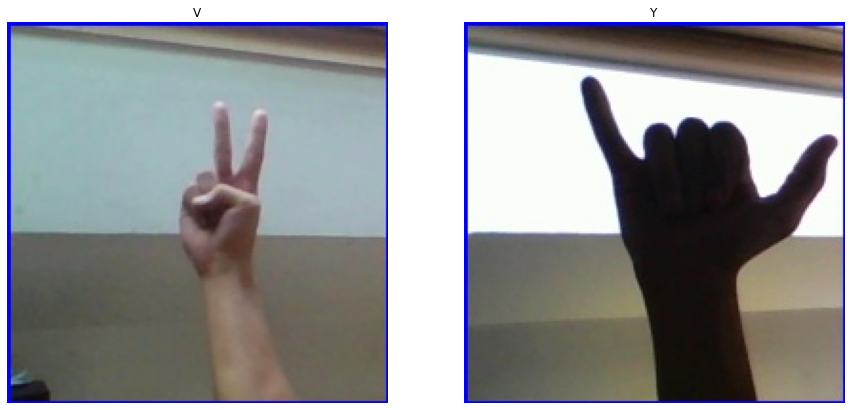

In [4]:
# Printing images
images = F.print_n_random_image('asl_alphabet_train/asl_alphabet_train/', 2, 2)

### Data Loader

In [5]:
IMAGE_SHAPE = (200, 200)
BATCH_SIZE = 32
tf.random.set_seed(42)

train_dir = "asl_alphabet_train/asl_alphabet_train/"
test_dir = "asl_alphabet_test/asl_alphabet_test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
# train data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

Found 87000 images belonging to 29 classes.


In [7]:
# test data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 28 images belonging to 29 classes.
